階層的クラスタリングの出力については[ここ](https://qiita.com/maskot1977/items/a35ac2fdc2c7448ee526)

サンプルデータ生成については[ここ](https://stackabuse.com/generating-synthetic-data-with-numpy-and-scikit-learn/)

In [1]:
import numpy as np

# Needed for plotting
import matplotlib.colors
import matplotlib.pyplot as plt

# Needed for generating classification, regression and clustering datasets
import sklearn.datasets as dt

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [2]:
# Define the seed so that results can be reproduced
seed = 11
rand_state = 11

# Define the color maps for plots
color_map = plt.cm.get_cmap('RdYlBu')
color_map_discrete = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","cyan","magenta","blue"])

In [3]:
X, y = dt.make_classification(
    n_samples=100,
    n_features=2,
    class_sep=10,
    n_redundant=0, # 意味のない列を何列つくるか
    n_repeated=0 # 同じ列を何列つくるか。この２つは、病的な例を再現する意図のインプット（多分）
)

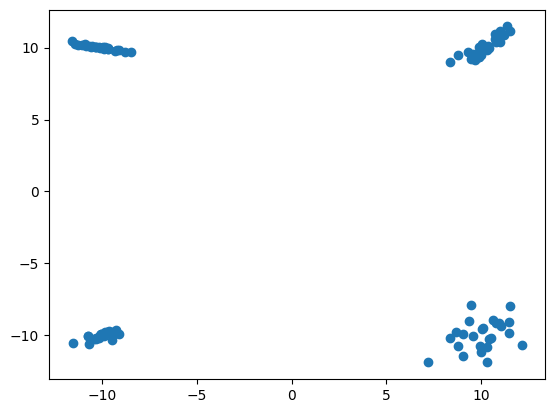

In [4]:
plt.scatter(X[:,0], X[:,1])

分かりやすく4つに分かれた

In [5]:
ret = linkage(X, metric="euclidean", method="average")

`dendrogram`で階層を表示できる

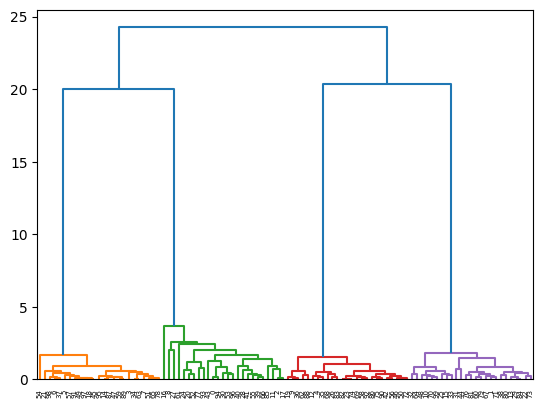

In [6]:
dendrogram(ret)
plt.show()

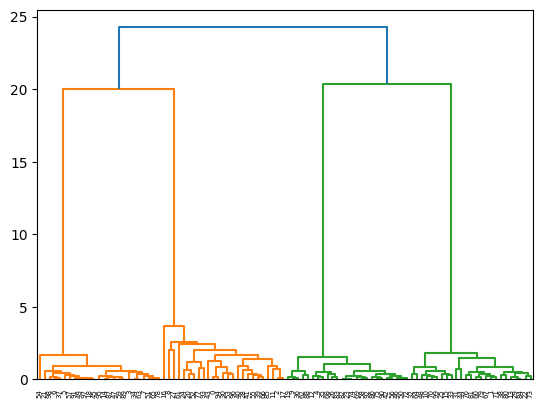

In [7]:
dendrogram(ret, color_threshold=22)
plt.show()

`dendrogram`の`color_threshold`でクラスタの判別場所を変更できる

In [8]:
ret.shape

(99, 4)

In [9]:
ret[:4]

array([[2.30000000e+01, 7.40000000e+01, 1.32174792e-02, 2.00000000e+00],
       [3.40000000e+01, 6.30000000e+01, 2.38475391e-02, 2.00000000e+00],
       [2.90000000e+01, 8.40000000e+01, 2.41017775e-02, 2.00000000e+00],
       [1.40000000e+01, 8.70000000e+01, 3.59705152e-02, 2.00000000e+00]])

`linkage`の出力は、サンプル数 x 4の行列。

- 1, 2列目: マージされるクラスタのid
- 3列目: クラスタ間の距離
- 4列目: できあがるクラスタのサイズ

In [10]:
len(set(ret[:,0]).union(set(ret[:,1])))

198

↑クラスタのidをdistinctすると198個（サンプル数は100）

- 最初にサイズ1のクラスタが100個
- 一回マージが起こると、新しいクラスタidが1個増える
  - 例えば最初のマージで2つのサイズ1のクラスタがマージされると新しくサイズ2のクラスタができるが、こいつには、新しくクラスタidが付与される
- ぜんぶで100-1 = 99回マージが起こり、各々についてクラスタidが1個増えるので、全部で199個のidがあるかと思いきや、最後の1個=サンプル全てが属するクラスタにはマージの履歴には現れないので

[公式](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.fcluster.html#scipy.cluster.hierarchy.fcluster)には、`fclust`という変換関数で、階層クラスタの結果をフラットに変換できると言っている

2個目の引数 `t` で、サイズをコントロールする。方法は複数種類のオプションがあるが、大体、distanceで見ると公式は言っている。で、マニュアルを読むと

> Forms flat clusters so that the original observations in each flat cluster have no greater a cophenetic distance than `t`.

とのこと。cophenetic distanceは、[rの解説](https://rdrr.io/r/stats/cophenetic.html)を読むと・・

> The cophenetic distance between two observations that have been clustered is defined to be the intergroup dissimilarity at which the two observations are first combined into a single cluster. Note that this distance has many ties and restrictions. 

で、

> It can be argued that a dendrogram is an appropriate summary of some data if the correlation between the original distances and the cophenetic distances is high. Otherwise, it should simply be viewed as the description of the output of the clustering algorithm. 

とのこと

おそらく、上のデンドログラムの縦軸は、cophenetic distance。上の絵を見ると、20くらい以上を`t`に指定すると2つに分かれそう

In [104]:
fcluster(ret, 21, criterion="distance")

array([1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2,
       2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2,
       2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2], dtype=int32)

5-20くらいだと4つ

In [105]:
fcluster(ret, 18, criterion="distance")

array([2, 4, 4, 4, 1, 3, 1, 1, 1, 1, 4, 3, 3, 2, 3, 2, 1, 1, 4, 3, 4, 3,
       2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 4, 4, 3, 3, 1, 1, 3, 4, 1, 4, 4,
       4, 2, 4, 3, 4, 1, 4, 2, 3, 4, 3, 2, 3, 1, 2, 3, 3, 3, 2, 4, 2, 4,
       3, 4, 4, 1, 4, 2, 3, 1, 1, 1, 1, 4, 3, 2, 2, 2, 1, 2, 4, 3, 3, 2,
       3, 4, 3, 3, 2, 2, 1, 2, 1, 4, 1, 3], dtype=int32)

In [106]:
fcluster(ret, 6, criterion="distance")

array([2, 4, 4, 4, 1, 3, 1, 1, 1, 1, 4, 3, 3, 2, 3, 2, 1, 1, 4, 3, 4, 3,
       2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 4, 4, 3, 3, 1, 1, 3, 4, 1, 4, 4,
       4, 2, 4, 3, 4, 1, 4, 2, 3, 4, 3, 2, 3, 1, 2, 3, 3, 3, 2, 4, 2, 4,
       3, 4, 4, 1, 4, 2, 3, 1, 1, 1, 1, 4, 3, 2, 2, 2, 1, 2, 4, 3, 3, 2,
       3, 4, 3, 3, 2, 2, 1, 2, 1, 4, 1, 3], dtype=int32)

In [14]:
labels = fcluster(ret, 6, criterion="distance")

labels

array([2, 4, 2, 1, 3, 1, 1, 1, 2, 3, 4, 2, 3, 4, 1, 4, 2, 2, 1, 3, 2, 1,
       4, 3, 2, 4, 3, 2, 2, 4, 2, 4, 4, 4, 1, 3, 3, 1, 4, 2, 2, 2, 3, 2,
       4, 1, 3, 1, 4, 1, 3, 1, 2, 2, 1, 2, 3, 1, 3, 1, 4, 2, 3, 1, 4, 1,
       2, 4, 3, 3, 4, 4, 3, 4, 3, 3, 4, 2, 1, 4, 4, 4, 3, 3, 4, 2, 3, 1,
       3, 1, 3, 1, 3, 2, 2, 1, 2, 1, 1, 4], dtype=int32)

## 評価指標

### silhouette score

クラスタ内での距離の平均とクラスタ間での距離の平均の比率 [sklearn.metrics.silhouette_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)

1が最良。0が、overlappingしている。定義的には-1まで出る可能性があるが、クラスタ内よりも他のクラスタの方が近いという状況で、不自然。

In [19]:
from sklearn.metrics import silhouette_score
help(silhouette_score)

Help on function silhouette_score in module sklearn.metrics.cluster._unsupervised:

silhouette_score(X, labels, *, metric='euclidean', sample_size=None, random_state=None, **kwds)
    Compute the mean Silhouette Coefficient of all samples.
    
    The Silhouette Coefficient is calculated using the mean intra-cluster
    distance (``a``) and the mean nearest-cluster distance (``b``) for each
    sample.  The Silhouette Coefficient for a sample is ``(b - a) / max(a,
    b)``.  To clarify, ``b`` is the distance between a sample and the nearest
    cluster that the sample is not a part of.
    Note that Silhouette Coefficient is only defined if number of labels
    is ``2 <= n_labels <= n_samples - 1``.
    
    This function returns the mean Silhouette Coefficient over all samples.
    To obtain the values for each sample, use :func:`silhouette_samples`.
    
    The best value is 1 and the worst value is -1. Values near 0 indicate
    overlapping clusters. Negative values generally indi

In [20]:
silhouette_score(X, labels)

0.9372594323028375

### cophenetic correlation

上のrの解説で出てきている、cophenetic distanceと実際の距離の相関係数 [scipy.cluster.hierarych.cophenet](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.cophenet.html#scipy.cluster.hierarchy.cophenet) でcophenet距離 or coefficientが計算できる

In [17]:
from scipy.cluster.hierarchy import cophenet

In [21]:
help(cophenet)

Help on function cophenet in module scipy.cluster.hierarchy:

cophenet(Z, Y=None)
    Calculate the cophenetic distances between each observation in
    the hierarchical clustering defined by the linkage ``Z``.
    
    Suppose ``p`` and ``q`` are original observations in
    disjoint clusters ``s`` and ``t``, respectively and
    ``s`` and ``t`` are joined by a direct parent cluster
    ``u``. The cophenetic distance between observations
    ``i`` and ``j`` is simply the distance between
    clusters ``s`` and ``t``.
    
    Parameters
    ----------
    Z : ndarray
        The hierarchical clustering encoded as an array
        (see `linkage` function).
    Y : ndarray (optional)
        Calculates the cophenetic correlation coefficient ``c`` of a
        hierarchical clustering defined by the linkage matrix `Z`
        of a set of :math:`n` observations in :math:`m`
        dimensions. `Y` is the condensed distance matrix from which
        `Z` was generated.
    
    Returns
    -

In [22]:
cophenet(ret)

array([24.26634108,  1.70473941, 20.04059745, ...,  0.41434346,
       24.26634108, 24.26634108])

scipyの距離行列は、condensed formで出力されるらしい

In [28]:
len(cophenet(ret))

4950

In [29]:
from scipy.spatial.distance import squareform

squareform(cophenet(ret))

array([[ 0.        , 24.26634108,  1.70473941, ..., 20.04059745,
        20.04059745, 24.26634108],
       [24.26634108,  0.        , 24.26634108, ..., 24.26634108,
        24.26634108,  1.78050928],
       [ 1.70473941, 24.26634108,  0.        , ..., 20.04059745,
        20.04059745, 24.26634108],
       ...,
       [20.04059745, 24.26634108, 20.04059745, ...,  0.        ,
         0.41434346, 24.26634108],
       [20.04059745, 24.26634108, 20.04059745, ...,  0.41434346,
         0.        , 24.26634108],
       [24.26634108,  1.78050928, 24.26634108, ..., 24.26634108,
        24.26634108,  0.        ]])

squareformで正方行列にできる

In [30]:
(100 * 100 - 100) / 2

4950.0

condensed formは、距離行列の非対角成分を一列に並べたものだろう

In [33]:
from scipy.spatial.distance import pdist

In [34]:
cophenet(ret, pdist(X))

(0.9492851163847815,
 array([24.26634108,  1.70473941, 20.04059745, ...,  0.41434346,
        24.26634108, 24.26634108]))

元の距離行列を与えると、cophenetの相関係数を計算してくれる